# Handling Time-Series Data with Pandas
Time-series data is a type of data that is dependent on time and
changes with time. For instance, the hourly temperature for a specific
place changes after every hour and is dependent on time. Similarly,
the stock prices of a particular company change with every passing
day.

## 1. Introduction to Time-Series in Pandas
The TimeStamp data type in Pandas is the most basic unit for storing
time-step data. Let’s see this with the help of an example.
The following script uses the date_range() function to create a
collection that contains dates in the form of time stamps.

In [1]:
# Import the pandas library and alias it as pd
import pandas as pd

# Import the numpy library and alias it as np (not used in this snippet)
import numpy as np

# Import the datetime class from the datetime module (also not used in this snippet)
from datetime import datetime

# Create a sequence of dates from January 1, 2021 to June 30, 2021 (inclusive)
dates = pd.date_range(start='1/1/2021', end='6/30/2021')

# Print the number of dates in the range
print(len(dates))  # Output: 181 (number of days between Jan 1 and Jun 30 inclusive)

# Print the list of dates
print(dates)  # Output: DatetimeIndex object with daily frequency

181
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', length=181, freq='D')


In [2]:
# 'dates' is assumed to be a Pandas Series, DataFrame column, or list containing datetime objects
# 'dates[0]' accesses the first element in the 'dates' object
# 'type(...)' returns the data type of that first element

type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
# Create a DataFrame from the list 'dates' with a single column named 'Date'
date_df = pd.DataFrame(dates, columns=['Date'])

# Add a new column 'Temperature' to the DataFrame
# Fill it with random integers between 0 (inclusive) and 50 (exclusive)
# The number of random values generated matches the number of dates
date_df['Temperature'] = np.random.randint(
    0,               # Lower bound (inclusive)
    50,              # Upper bound (exclusive)
    size=(len(dates))  # Number of values to generate = length of 'dates' list
)

# Display the first 5 rows of the DataFrame to preview the data
date_df.head()

,Date,Temperature
0,2021-01-01,19
1,2021-01-02,27
2,2021-01-03,2
3,2021-01-04,36
4,2021-01-05,37


<Axes: >

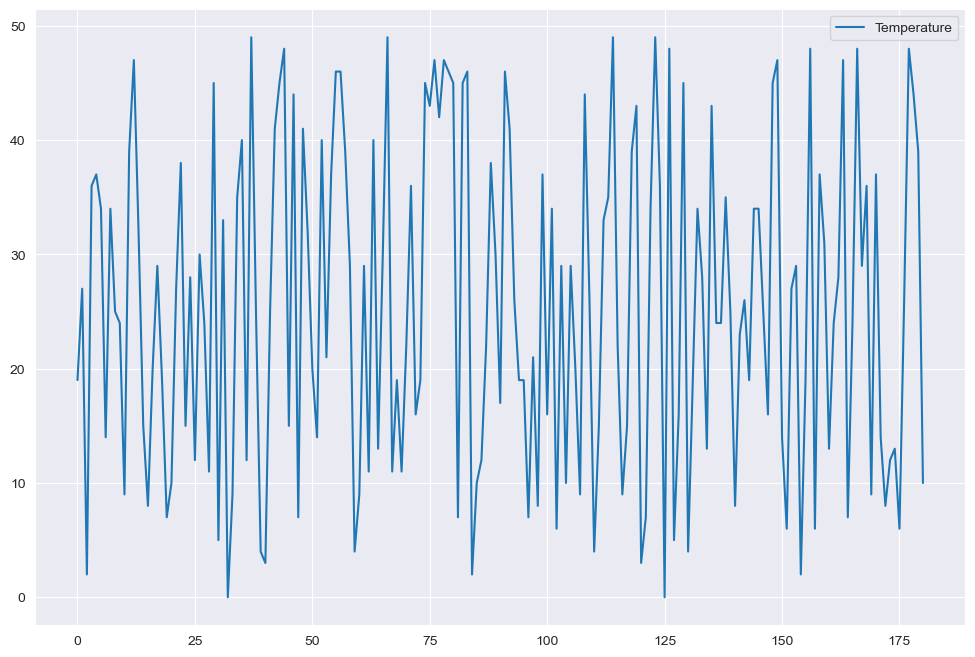

In [4]:
# Import the seaborn library for data visualization
import seaborn as sns

# Set the seaborn plotting style to "darkgrid" for better aesthetics
sns.set_style("darkgrid")

# Plot a line graph using the 'Temperature' column from the 'date_df' DataFrame
# The figure size is set to 12 inches wide and 8 inches tall
date_df.plot.line(y='Temperature', figsize=(12, 8))

## 2. Time Resampling and Shifting
In this section, you will see how to resample and shift the time series
data with Pandas.
You will work with Google Stock Price data from 6th
January 2015 to
7th
January 2020. The dataset is available in the Data
folder of the
book resources by the name google_data.csv. The following script
reads the data into a Pandas dataframe.

In [5]:


# Importing the Seaborn library for visualization
import seaborn as sns

# Importing the Pandas library for data manipulation
import pandas as pd

# Setting the style of the plots to "darkgrid" for better visual appeal
sns.set_style("darkgrid")

# URL contains Google stock price from 2024-6-26 to 2025-7-25
url = "https://raw.githubusercontent.com/duochen/data-science-bootcamp/refs/heads/main/Lecture04/Exercises/google_stock_prices.csv"

# Reading the Google stock data from a CSV file into a Pandas DataFrame
google_stock = pd.read_csv(url)

# Displaying the first 5 rows of the DataFrame to get a quick overview of the data
google_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
Jul 25,2025,192.93,195.27,192.13,194.08,194.08,31082500
Jul 24,2025,198.11,198.97,191.95,193.20,193.20,45252100
Jul 23,2025,192.36,193.36,190.18,191.51,191.51,34068100
Jul 22,2025,192.42,193.36,188.49,192.11,192.11,26212900
Jul 21,2025,187.10,191.26,187.05,191.15,191.15,24665000


<Axes: xlabel='Date'>

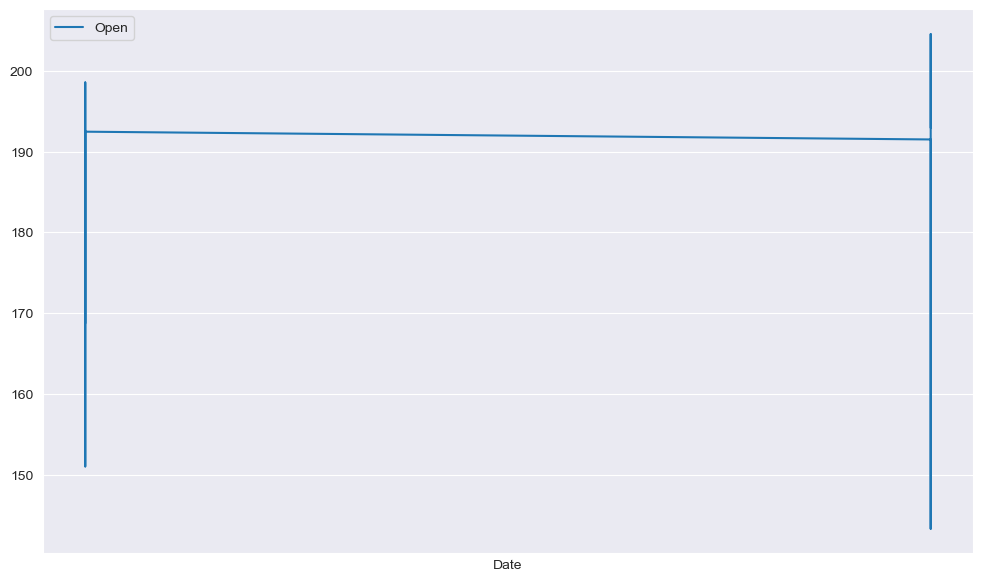

In [6]:
# Convert the 'Date' column to datetime format using pandas' to_datetime function
google_stock['Date'] = google_stock['Date'].apply(pd.to_datetime)

# Set the 'Date' column as the index of the DataFrame
google_stock.set_index('Date', inplace=True)

# Plot a line chart of the 'Open' prices with a figure size of 12 inches by 8 inches
google_stock.plot.line(y='Open', figsize=(12, 8))